# Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

**Цель:**
* Проанализировать рынок общественного питания в г. Москва.

**Задачи:**

1. Исследовать соотношение видов объектов общественного питания по количеству.
2. Исследовать соотношение сетевых и несетевых заведений по количеству.
3. Изучить, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.
4. Описать для каждого вида объекта общественного питания среднее количество посадочных мест.
5. Выделить в отдельный столбец информацию об улице из столбца address .
6. Построить график топ-10 улиц по количеству объектов общественного питания.
7. Найти число улиц с одним объектом общественного питания.
8. Выявить закономерности количества посадочных мест для улиц с большим количеством объектов общественного питания. 

# Импорт библиотек, загрузка данных и определение функций для построения графиков

In [1]:
#импортируем библиотеки и параметры
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth', None)
sns.set(rc={'figure.figsize':(17,8)})

In [2]:
#загрузим данные в переменные
try:
    df = pd.read_csv('../9 project/rest_data.csv')
except: 
    df = pd.read_csv('/datasets/rest_data.csv')

## Предобработка данных

In [3]:
df.head(5) #выведем 5 строк датасета

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Из описания к данным, таблица `rest_data` имеет столбцы, которые содержатследующую информацию:

* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.


Создадим функцию для быстрого анализа стоблцов датафрейма на основные параметры (пропуски, типы и количество данных и т.д.)

In [4]:
#функцие будем передавать датасет, в цикле будем перебирать столбцы
def dataset_info(dataset):
    count = 0
    dataset.columns = dataset.columns.str.lower().str.replace(' ','_') #тут приведем название столбцов к snake_case
    for column in dataset.columns:
        count += 1
        print('Название столбца:     ',column)                          #покажет как называется столбец
        print('Длина столбца:        ',len(dataset[column]))            #отобразит длину столбца
        print('Количество пропусков: ',dataset[column].isna().sum())    #отобразит количество пропусков
        print('Тип данных в столбце: ',dataset[column].dtype)           #покажет тип данных в столбце
        print('Пример значений:      ')                                 
        print(dataset[column].unique())                                 #отобразит уникальные значения
        print('----------------')
    print('Всего столбцов в датасете:', count)                          #подсчитаем количество столбцов в датасете
    print('Количество дубликатов: ',dataset.duplicated().sum())         #подсчитает количество полных строк-дубликатов

In [5]:
dataset_info(df) #воспользуемся функцией

Название столбца:      id
Длина столбца:         15366
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[151635  77874  24309 ... 209186 221900 222535]
----------------
Название столбца:      object_name
Длина столбца:         15366
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['СМЕТАНА' 'Родник' 'Кафе «Академия»' ... 'Бар Мята Lounge'
 'Мята Lounge Октябрьская' 'Кальянная «Мята Lounge»']
----------------
Название столбца:      chain
Длина столбца:         15366
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['нет' 'да']
----------------
Название столбца:      object_type
Длина столбца:         15366
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']
----------------
Название столбца:      address
Длина столбца:         15366
Количество

Что мы имеем в столбцах:
* id - пропусков нет, тип данных корректный, наименование столбца - корректное;
* object_name - пропусков нет, тип данных корректный, наименование столбца - корректное, однако в примере данных видно применение разного регистра написания названий, изучим в дальнейших шагах;
* chain - пропусков нет, наименование столбца - корректное, т.к. имеем два вида значений (ДА и НЕТ), можно в следующих шагах привести данные к *boolen* с True/False;
* object_type - пропусков нет, тип данных корректный, наименование столбца - корректное;
* address - пропусков нет, тип данных корректный, наименование столбца - корректное. Однако;
* number - пропусков нет, тип данных корректный, наименование столбца - корректное.

Всего в датасете 6 столбцов и 15366 строк. *Полных* дубликатов строк у нас нет.

Т.к. полных дубликатов нет, проверим на наличие неполных, т.е. уберем из такого сравнения стоблец `id`.

In [6]:
df[df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number'])].shape

(82, 6)

Имеем 82 похожих строки, что составляет 0,5% всего датасета. Такое "задвоение" может возникнуть, когда данные вносятся и не сравниваются с актуальной базой по параметрам. Например, при прочих равных парамтерах, у таких объевтов может различное написание, у одного строчными буквами у другого ПРОПИСНЫМИ. Удалим такие "двойные" данные.

In [7]:
df=df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])

Проверим выполение кода

In [8]:
df[df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number'])].shape

(0, 6)

Проверим количество уникальных наименований объектов общественного питания (далее - ООП):

In [9]:
len(df['object_name'].unique()) #проверка уникальных значений

10393

Так как при анализе стоблцов, мы видели, что некоторые названия заведений ООП написаны заглавными буквами, приведем все названия к нижнему регистру и сделаем првоерку на колчиество уникальных. Таким образом мы сгруппируем названия одной сети, но написанные разным регистром.

In [10]:
df['object_name'] = df['object_name'].str.lower() #приведем все названия к строчному написанию

In [11]:
len(df['object_name'].unique()) #проверка уникальных значений

9924

Таким образом, мы уменьшили количество дублей на 469 позиций! Теперь запросим топ-50 крупных ООП.

In [12]:
df['object_name'].value_counts().head(50)

столовая                               321
кафе                                   264
шаурма                                 242
шоколадница                            158
kfc                                    155
макдоналдс                             150
бургер кинг                            137
теремок                                 94
домино'с пицца                          90
крошка картошка                         90
пекарня                                 81
буфет                                   76
суши wok                                72
милти                                   72
папа джонс                              51
додо пицца                              49
кофе с собой                            44
школьно-базовая столовая                44
чайхона №1                              43
донер кебаб                             41
кафетерий                               38
хинкальная                              38
якитория                                38
выпечка    

Визуальный контроль, выявил одну проблему, например у нас есть *шоколадница* и *кафе «шоколадница»*. Т.е. ООП один и тот же, но название написано по-другому. Проверим на этом же примере какие еще написания названий имеет *шоколадница*.

In [13]:
df[df['object_name'].str.contains("шоколадница", case=False, na=False)].groupby('object_name').agg({'object_name': 'count'})

,object_name
object_name,
кафе «шоколадница»,18
кофейня «шоколадница»,6
кофейня шоколадница,4
шоколадница,158
шоколадница кофе хаус,1
шоколадница кофемания,1
шоколадница экспресс,1


Итого 31 название, отличное от "оригинального". Создадим функцию, которая будет приводить "длинные" названия ООП к одному короткому. Тем самым мы еще сгруппируем одинаковые ООП.

In [14]:
def name_change(aim):
        if 'шоколадница' in aim:
            return 'шоколадница'
        if 'kfc' in aim:
            return 'kfc'
        if ('starbucks' in aim) or ('старбакс' in aim):
            return 'starbucks'
        if 'макдоналдс' in aim:
            return 'макдоналдс'
        if 'бургер кинг' in aim:
            return 'бургер кинг'
        if 'теремок' in aim:
            return 'теремок'
        if 'крошка картошка' in aim:
            return 'крошка картошка'
        if "домино'с пицца" in aim:
            return "домино'с пицца"
        if 'папа джонс' in aim:
            return 'папа джонс'
        if 'додо пицца' in aim:
            return 'додо пицца'
        if 'якитория' in aim:
            return 'якитория'
        if 'кофе хаус' in aim:
            return 'кофе хаус'
        if ('subway' in aim) or ('сабвэй' in aim) or ('сабвей' in aim):
            return 'subway'
        if 'тануки' in aim:
            return 'тануки'
        if ('cofix' in aim) or ('кофикс' in aim):
            return 'cofix'
        if 'патио' in aim:
            return 'иль патио'
        return aim

df['object_name'] = df['object_name'].apply(name_change) #применим нашу функцию

Проверим работу функции, подчитаем теперь колчиество уникальных значений

In [15]:
len(df['object_name'].unique()) #проверка уникальных значений

9811

Мы укрупнили ООП еще на 113 предприятий.

В анализе столбца `object_type`, мы видели две длинные формулировки *предприятие быстрого обслуживания* и *магазин (отдел кулинарии)*, поменяем их на более короткие: *фаст-фуд* и *кулинария*.

In [16]:
#заменим одни значения на другие
df.loc[(df.object_type == "предприятие быстрого обслуживания"), 'object_type'] = 'фаст-фуд'
df.loc[(df.object_type == "магазин (отдел кулинарии)"), 'object_type'] = 'кулинария'

In [17]:
df['object_type'].unique() #проверка замены

array(['кафе', 'столовая', 'закусочная', 'фаст-фуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

Проведя предобработку данных, мы выяснили следующее:
* наименования столбцов - корректное;
* пропусков в данных нет;
* сократили количество повторений названий ООП на 582 позиции!
* привели две категории ООП в более короткому написанию, которе не искажает суть, однако в дальнейшем будет корректно отображаться на графиках.

## Исследование соотношение видов объектов общественного питания по количеству

Сфомируем сводную таблицу типов ООП и их количества и визуализируем данные.

In [18]:
#создание сводной таблицы по типу ООП и колчиества
pivot_type = df.groupby('object_type', as_index=False).agg({'number':'count'})\
             .sort_values(by='number', ascending = False)
pivot_type['prcnt'] = (pivot_type['number']/pivot_type['number'].sum()*100).round(2)
display(pivot_type)

,object_type,number,prcnt
3,кафе,6071,39.72
7,столовая,2584,16.91
6,ресторан,2282,14.93
8,фаст-фуд,1898,12.42
0,бар,855,5.59
1,буфет,577,3.78
4,кафетерий,395,2.58
2,закусочная,349,2.28
5,кулинария,273,1.79


Создадим функцию для визуализации данных, ей будем передавать необходимые параметры, она в свою очередь - строить график.

In [19]:
#функция для визуализации данных посредством гистограммы
def barplot_create(x,y,table,title,xl,yl,cm, rot):
    ax = sns.barplot(x=x, y=y, data=table, dodge=True)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x()+(p.get_width()/2),
                y = height+cm,
                s = '{:.0f}'.format(height),
                ha = 'center')
    plt.xticks(rotation=rot)
    plt.title(title, fontsize = 20)
    plt.xlabel(xl)
    plt.ylabel(yl);

In [20]:
#функция для визуализации данных посредством "ящика с усами"
def boxplot_create(x,y,table,hue,title,xl,yl,rot,lim):
    a=sns.boxplot(x=x, y=y, data=table, hue=hue)
    plt.title(title, fontsize = 20)
    plt.xlabel(xl)
    plt.ylabel(yl)
    #plt.legend(title='Сетевое или нет')
    plt.xticks(rotation=rot)
    a.set(ylim=(0, lim));

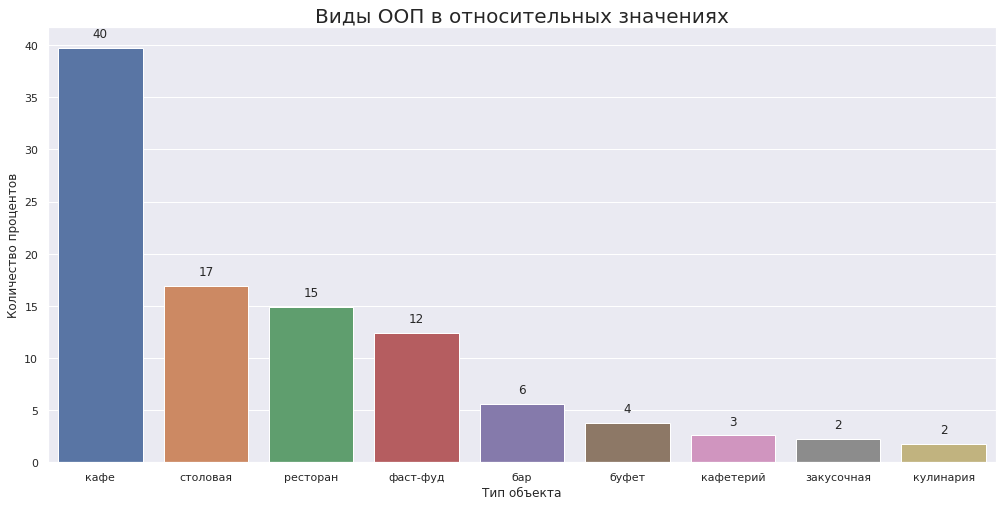

In [21]:
barplot_create('object_type','prcnt',pivot_type,'Виды ООП в относительных значениях','Тип объекта',\
               'Количество процентов',1,0)

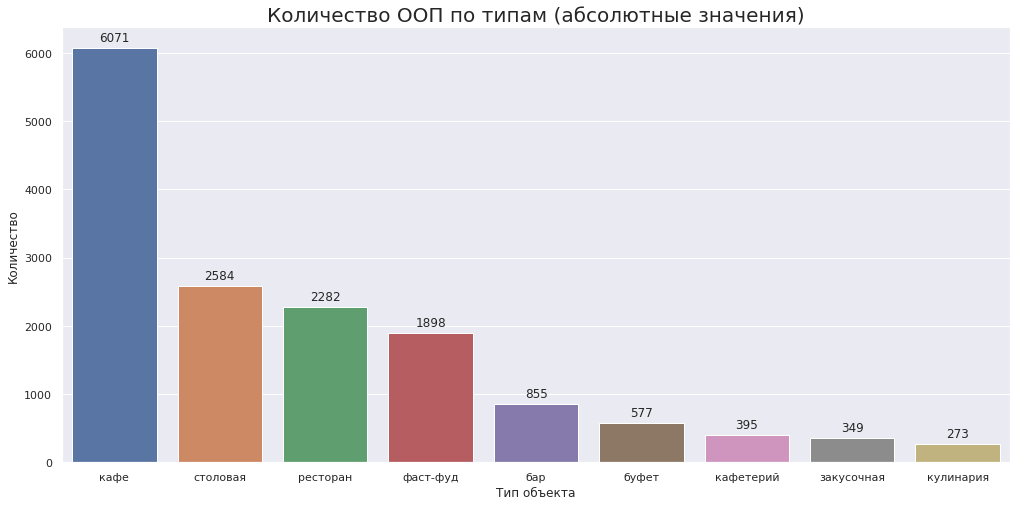

In [22]:
#визуализация сводной таблицы в абсолютных значениях
barplot_create('object_type','number',pivot_type,"Количество ООП по типам (абсолютные значения)","Тип объекта",\
               "Количество",100,0)

Преобладающим типом ООП является *кафе*, затем с сильным отставанием идет *столовая*, затем *ресторан*, немного остает *фаст-фуд*. Наименее популярные - *бар*, *буфет*, *кафетерий*, *закусочная* и самая непопулярная *кулинария* в магазине.

## Исследование соотношение сетевых и несетевых заведений

Теперь посмотри количество заведений, которые прнадлежат к сетевым и которые не принадлежат.

In [23]:
#сводная таблица сетевых/несетевых заведений
chain_type = df['chain'].value_counts().to_frame().reset_index() 

In [24]:
chain_type

,index,chain
0,нет,12320
1,да,2964


In [25]:
#подсчитаем процентное соотношение таких заведений
print('Количество сетевых ООП: {}, они составляют {:.2%} от общего числа'
      .format(chain_type['chain'][1],chain_type['chain'][1]/chain_type['chain'].sum()))
print('Количество несетевых ООП: {}, они составляют {:.2%} от общего числа'
      .format(chain_type['chain'][0],chain_type['chain'][0]/chain_type['chain'].sum()))
print('Количество несетевых ООП больше в {:.2} раза, чем сетевых'
      .format(chain_type['chain'][0]/chain_type['chain'][1]))

Количество сетевых ООП: 2964, они составляют 19.39% от общего числа
Количество несетевых ООП: 12320, они составляют 80.61% от общего числа
Количество несетевых ООП больше в 4.2 раза, чем сетевых


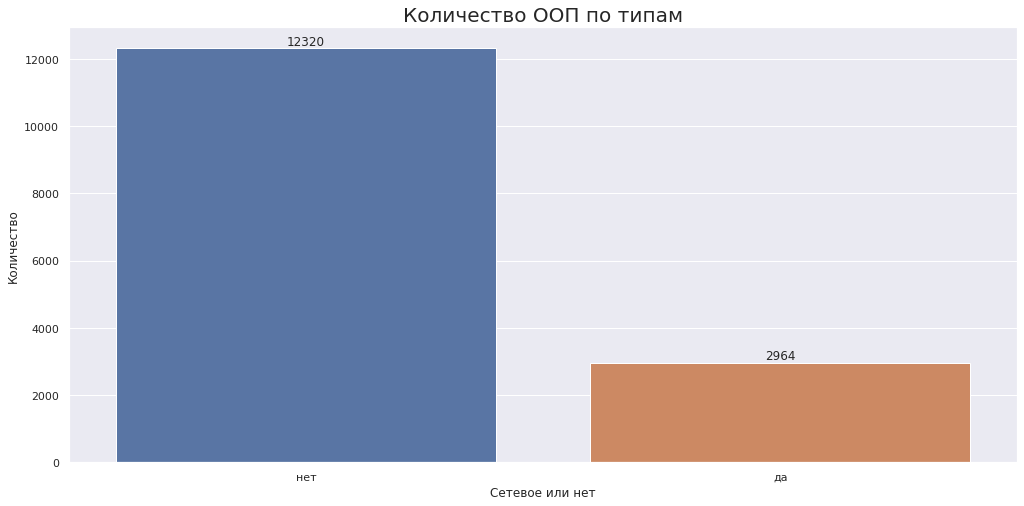

In [26]:
#визуализация сводной таблицы в асболютных значениях
barplot_create('index','chain',chain_type,"Количество ООП по типам","Сетевое или нет","Количество",100,0)

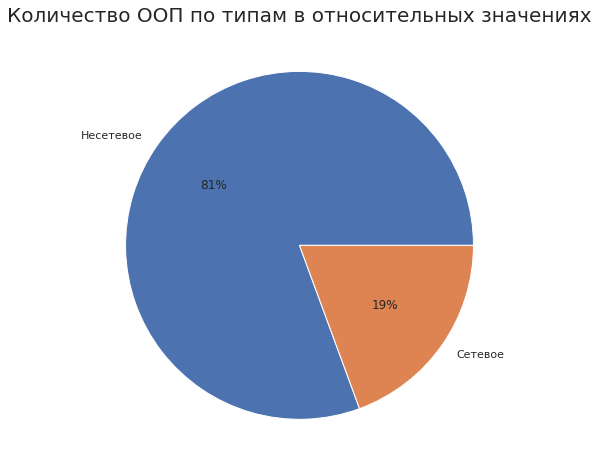

In [27]:
#та же информация, но в относительных значениях
labels = ['Несетевое','Сетевое']
colors = sns.color_palette()[0:2]
plt.pie(chain_type['chain'], labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Количество ООП по типам в относительных значениях', fontsize = 20)
plt.show()

Можно отметить, что несетевых ООП больше в 4,2 раза, чем сетевых. Теперь рассмотрим атрибут *сетевой/несетевой* в разрезе типов ООП.

In [28]:
#создадим сводную таблицу и рассчитаем процент сетевех заведений в данном виде ООП
pivot_chain_type = df.pivot_table(index ='object_type', columns = 'chain', values = 'number', aggfunc = 'count')\
                                 .reset_index().sort_values(by = 'да',ascending = False)
pivot_chain_type.columns = ['object_type', 'chain', 'not_chain']
pivot_chain_type['total'] = pivot_chain_type['chain'] + pivot_chain_type['not_chain']
pivot_chain_type['chain_prcnt'] = (pivot_chain_type['chain']/pivot_chain_type['total']*100).round(2)
pivot_chain_type['not_chain_prcnt'] = (pivot_chain_type['not_chain']/pivot_chain_type['total']*100).round(2)
display(pivot_chain_type)

,object_type,chain,not_chain,total,chain_prcnt,not_chain_prcnt
3,кафе,1396,4675,6071,22.99,77.01
8,фаст-фуд,788,1110,1898,41.52,58.48
6,ресторан,543,1739,2282,23.79,76.21
5,кулинария,78,195,273,28.57,71.43
2,закусочная,56,293,349,16.05,83.95
4,кафетерий,52,343,395,13.16,86.84
0,бар,37,818,855,4.33,95.67
1,буфет,11,566,577,1.91,98.09
7,столовая,3,2581,2584,0.12,99.88


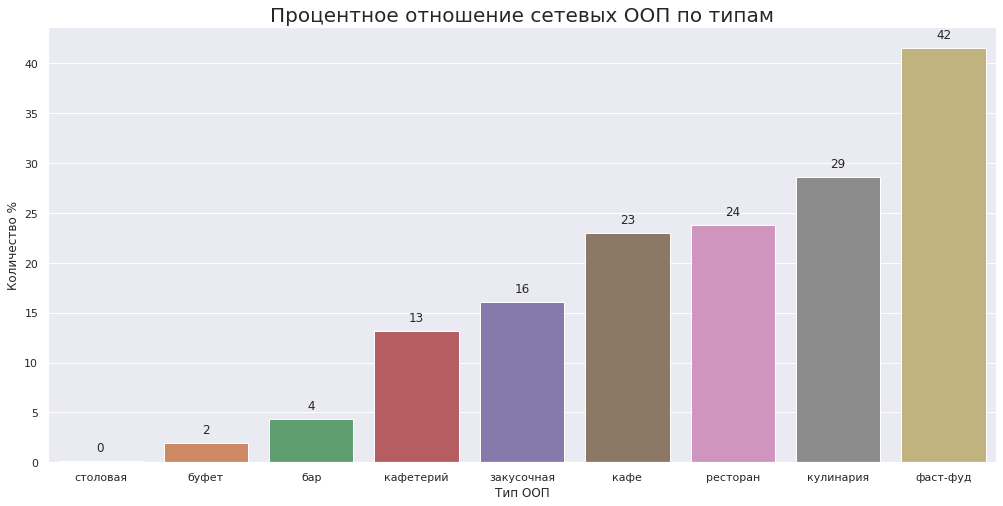

In [29]:
#визуализация сводной таблицы
barplot_create('object_type','chain_prcnt', pivot_chain_type.sort_values(by='chain_prcnt'),
                "Процентное отношение сетевых ООП по типам","Тип ООП","Количество %",1,0)

Большое количество сетевых заведений представлено в фаст-фуде (41%), кулинариях (29%), почти одинаковое колчиество у ресторанов и кафе (24% и 23% соответственно). Можно отметить, практическое отсутсвие сетевых заведений у столовых и малое количество у баров и буфетов.

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Чтобы ответить на этот вопрос, сразу отфильтруем заведения, в которых отсутствуют посадочные места. Т.к. в данный момент времени, с распространением доставки продуктов, данные заведения могут работать как *dark kitchen* так и только на *самовывоз* (нельзя также исключать банальной ошибки ввода значений).

In [30]:
#сводная таблица с количеством мест на заведение
object_seats = df.query('number >0').groupby(['object_name', 'chain']).agg({'id':'count', 'number':'mean'}).reset_index()
object_seats['number'] = object_seats['number'].round(0).astype('int')
object_seats.head(5)

,object_name,chain,id,number
0,1-й мок,нет,1,100
1,1-ый московский кадетский корпус,нет,1,260
2,100 личная столовая,нет,1,30
3,100 личное кафе,нет,1,45
4,1001 ночь,нет,1,70


Визуализируем полученные данные

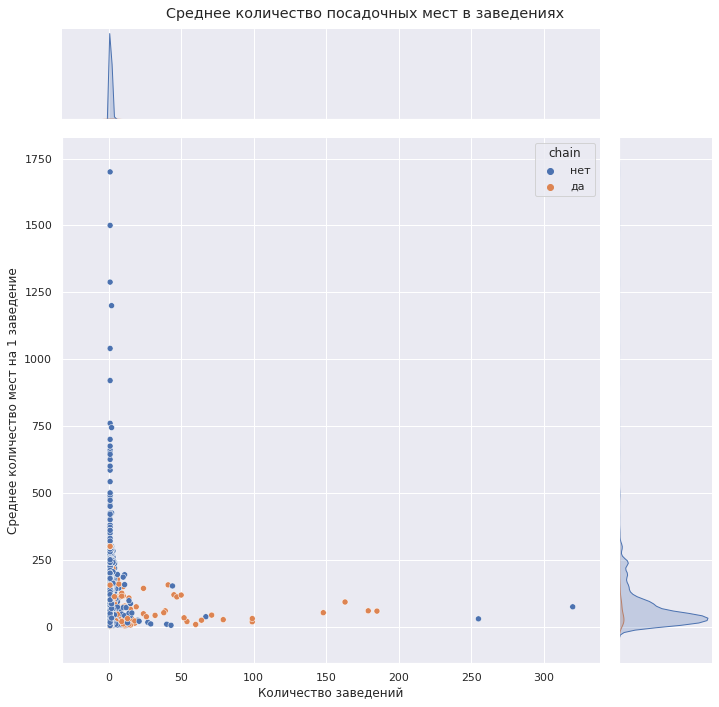

In [31]:
p=sns.jointplot(data=object_seats, x="id", y="number", hue ='chain', height=10)
p.fig.suptitle("Среднее количество посадочных мест в заведениях")
p.fig.subplots_adjust(top=0.95)
p.ax_joint.set_xlabel('Количество заведений')
p.ax_joint.set_ylabel('Cреднее количество мест на 1 заведение');

Можно отметить преобладание несетевых ООП с большим колчиеством посадочных мест, также можно увидеть, что у сетевых ООП в среднем до 125 мест. Увеличим детализацию, для более полного анализа.

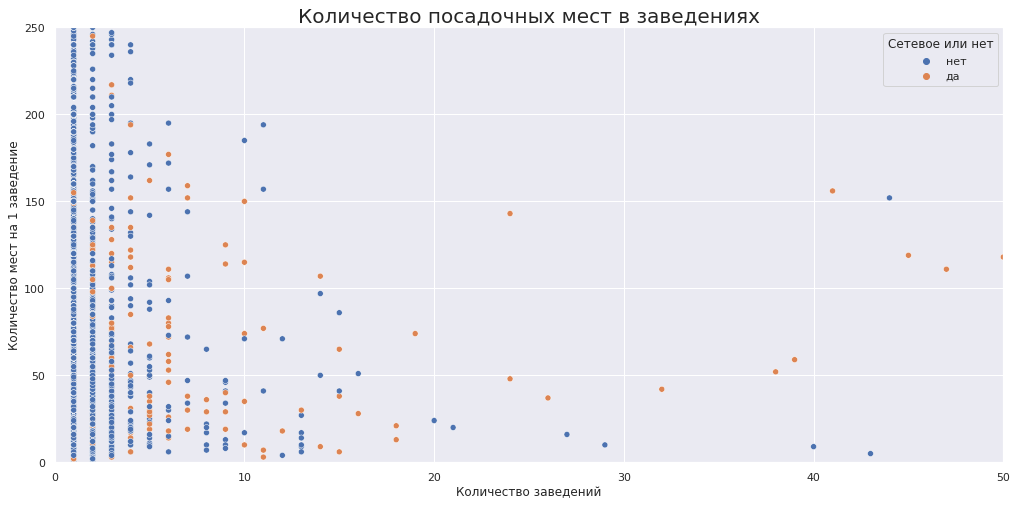

In [32]:
#увеличим детализацию
g=sns.scatterplot(data=object_seats, x="id", y="number", hue ='chain')
plt.title('Количество посадочных мест в заведениях', fontsize = 20)
plt.xlabel('Количество заведений')
plt.ylabel('Количество мест на 1 заведение')
plt.legend(title='Сетевое или нет')
g.set(ylim=(0, 250))
g.set(xlim=(0, 50));

С увеличением детализации, можно получше увидеть распределение. Все также преобладают несетевые ООП, у сетевых можно отметить следующую тенденцию - с ростом количества заведений, уменьшается среднее количество посадочных мест.

Можно увидеть, что у некоторых сетевых заведений имеется для один ООП. Такое может получится изи-за проблем с наполняемостью данных (если их вносят вручную, банально имеет место быть человеческому фактору). Также может ситуация, когда только открывающееся заведение планирует позиционировать себя как сеть, однако из-за рыночных ситуаций откладывает или отказывается от таких планов, но данные при этом не актуализируются. Ну а заведения с нулевыми местами, тут либо "человеческий фаткор" либо заведения типа dark kitchen.

## Среднее количество посадочных мест для видов общественного питания

Теперь определим медианное количество (т.к. мы увидели большое количество выбросов) посадочных мест, для отдельных видов ООП. Для начала рассмотрим места с учетом *dark-kitchen*, а затем без. Затем визуализируем данные с помощью `boxplot()`.

In [33]:
types_seats = df.groupby('object_type', as_index=False).agg({'number':'median'}).sort_values(by='number')\
              .reset_index(inplace = False, drop = True)

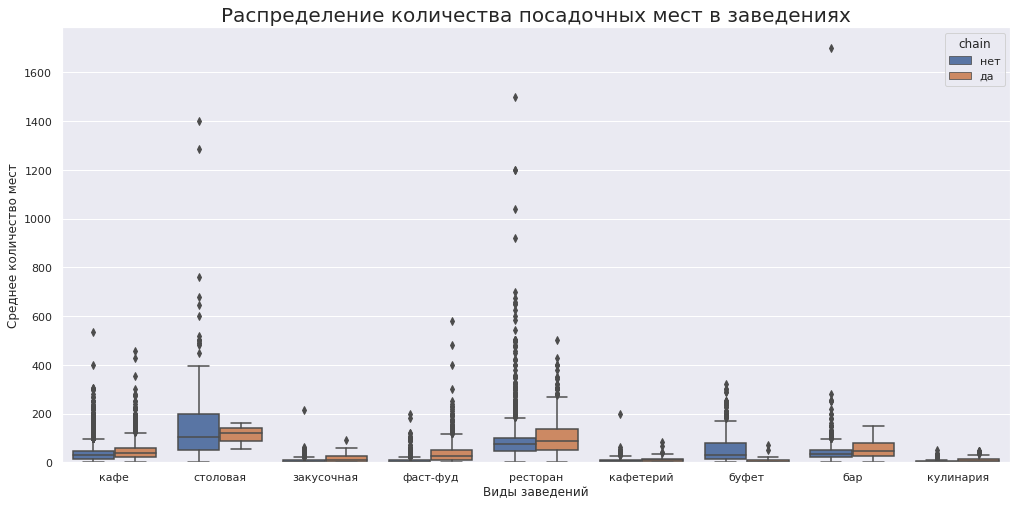

In [34]:
#визуализируем "ящик с усами" с помощью функции
boxplot_create("object_type","number",df,'chain','Распределение количества посадочных мест в заведениях',\
               'Виды заведений','Cреднее количество мест',None,None)

Подтверждение предудыщих шагов мы можем наблюдать на графике. Большое количество несетевых ООП типа столовая и ресторан имеют "выбросы", т.е. малое количество залов и большое количество посадочных мест. Также любопытно выглядит один несетевой бар с количеством мест около 1700. У сетевых же, мы не наблюдаем таких больших выбросов, это значит, что сетевые ООП в среднем имеют одинаковое число посадочных мест.

Увеличим детализацию

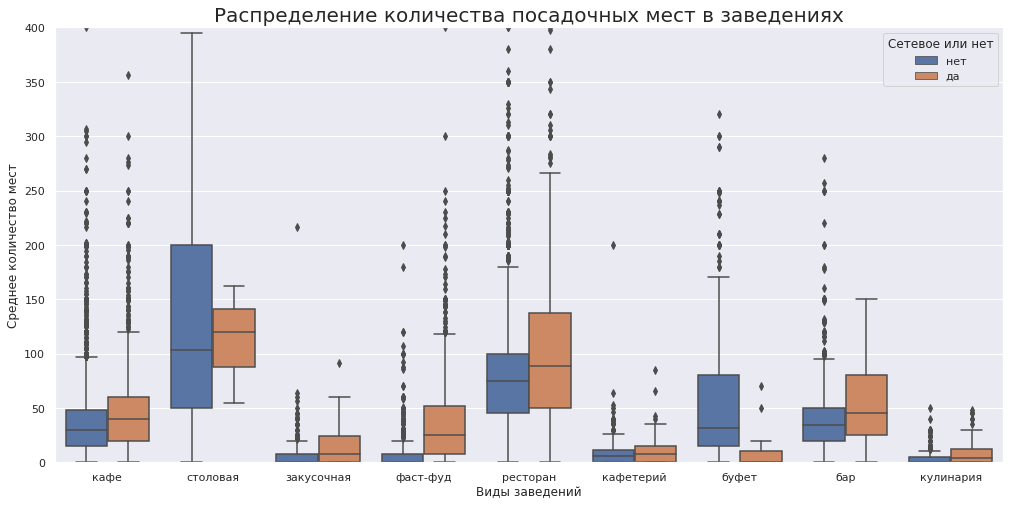

In [35]:
#визуализируем "ящик с усами" с помощью функции (с увеличенной детализацией)
boxplot_create("object_type","number",df,'chain','Распределение количества посадочных мест в заведениях',\
               'Виды заведений','Cреднее количество мест',None,400)
plt.legend(title='Сетевое или нет');

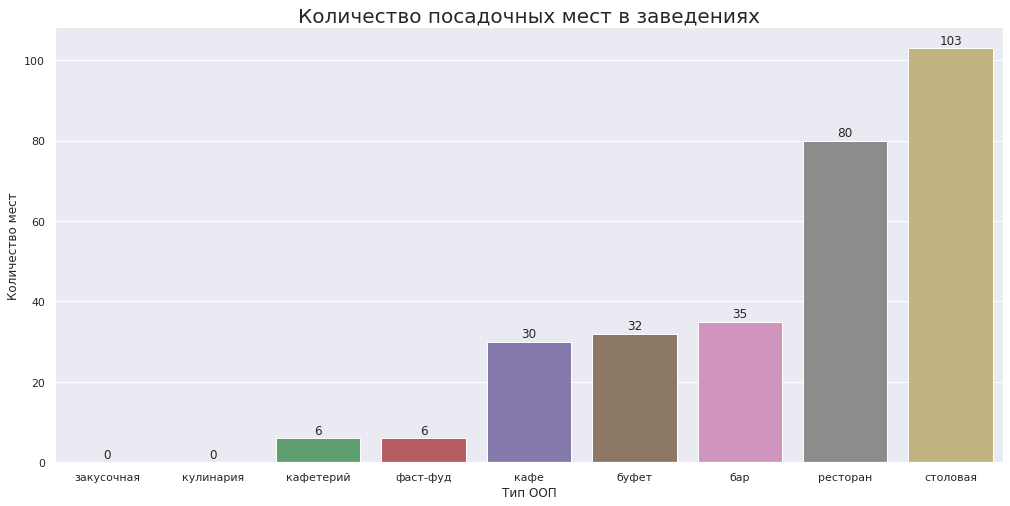

In [36]:
#визуализация посредством гистограммы
barplot_create('object_type','number', types_seats,
                "Количество посадочных мест в заведениях","Тип ООП","Количество мест",1,0)

В среднем, больше всего посадочных мест в столовых - 103, затем идут ресторан с 80, у бара, кафе и буфета - практически равные значения на уровне 30-35. Фаст-фуд и кафетерий предлагают в среднем 5-6 посадочных мест, а вот кулинарии и закусочные не предлагают вовсе.

Уберем из анализа мест, объекты типа *dark-kitchen* (с нулевым количеством мест), и повторим шаги

In [37]:
#формируем чистый датасет без нулевых мест
types_seats_clean = df.query('number > 0').groupby('object_type', as_index=False)\
                    .agg({'number':'median'}).sort_values(by='number').reset_index(inplace = False, drop = True)

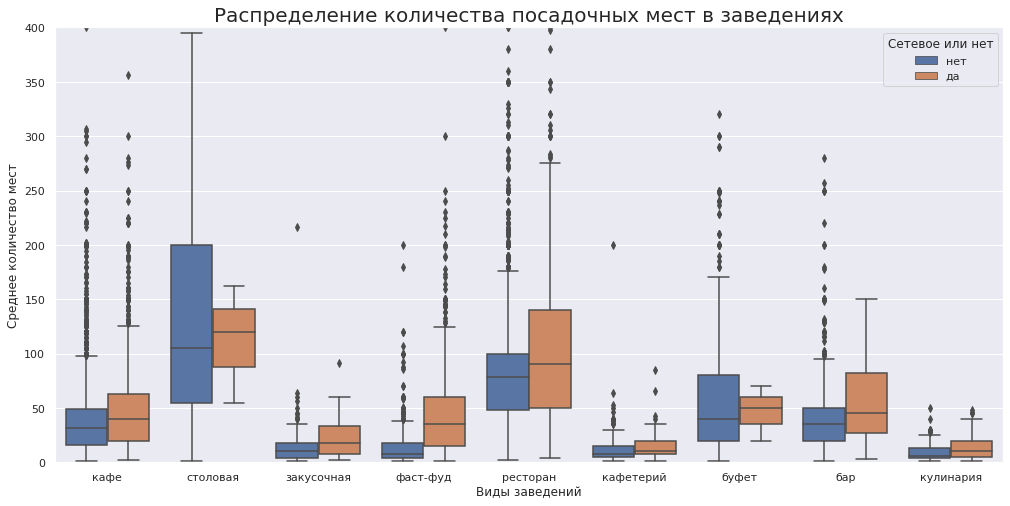

In [38]:
#визуализируем "ящик с усами" с помощью функции
boxplot_create("object_type","number",df.query('number > 0'),'chain','Распределение количества посадочных мест в заведениях',\
               'Виды заведений','Cреднее количество мест',None,400)
plt.legend(title='Сетевое или нет');

Из графика видно, что после очистки, графики "оторвались" от нулевых значений (что показывает нам об изменении значений количества мест), однако картина кардинально не поменялась. Взглянем на данные через гистограмму.

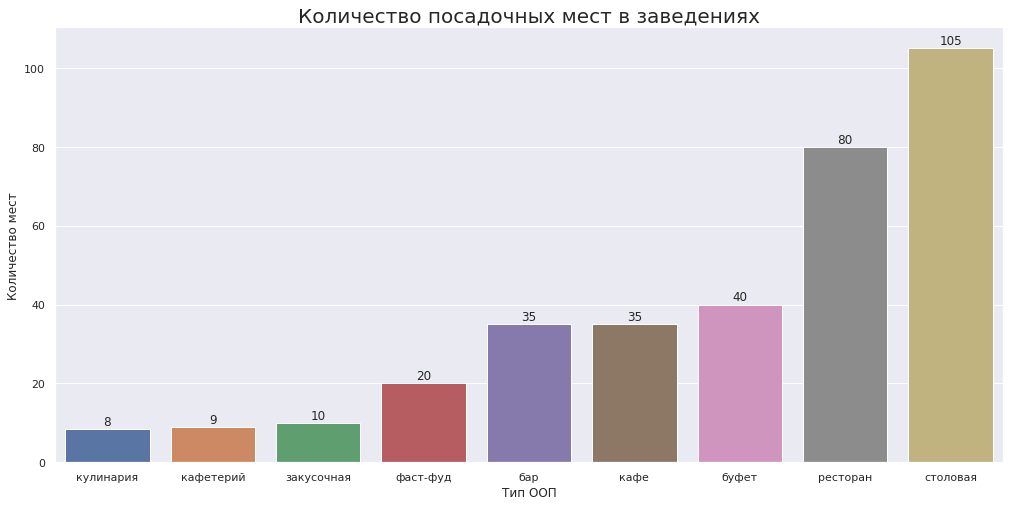

In [39]:
#визуализация среднего количества мест по видам
barplot_create('object_type','number', types_seats_clean,
                "Количество посадочных мест в заведениях","Тип ООП","Количество мест",1,0)

Тут следует отметить, у каких заведений поменялось количество посадочных мест. Это закусочная (с 0 до 10), кулинария (с 0 до 8) фаст-фуд (с 5 до 20), кафетерий (с 6 до 9). На остальных позициях ситуация не поменялась.

## Выделение информации об улице в отдельный столбец

Для начала выделим название улицы из адреса в отдельный столбец и приведем к строчному написанию

In [40]:
df['streetname'] = df["address"].transform(lambda x: str(x).split(", ")[1]).str.lower()
df.head(5)

,id,object_name,chain,object_type,address,number,streetname
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


По условию, нам необходимо в дальнейших шагах, с помощью внешних источников, определить в каком районе находится улица. Подключим этот внешний источник и также переведем названия улиц к строчному написанию.

In [41]:
blank = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y')
blank['streetname']=blank['streetname'].str.lower()
blank.head(5)

,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


Присоединим одну таблицу к другой, и удалим дубликаты (строки дублируются, т.к. одна и та же удица может находится в разных районах):

In [42]:
df_area = df.merge(blank[['streetname','area','okrug']], on = 'streetname', how = 'left')
display(df_area.head(5))
print(df_area.shape)

,id,object_name,chain,object_type,address,number,streetname,area,okrug
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица егора абакумова,Ярославский Район,СВАО
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина,Таганский район,ЦАО
2,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина,Нижегородский район,ЮВАО
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина,Район Южное Бутово,ЮЗАО
4,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,абельмановская улица,Таганский район,ЦАО


(30241, 9)


In [43]:
df_area=df_area.drop_duplicates(subset=['id','object_name', 'chain', 'object_type', 'address', 'number'])
display(df_area.head(5))
print(df_area.shape)

,id,object_name,chain,object_type,address,number,streetname,area,okrug
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица егора абакумова,Ярославский Район,СВАО
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина,Таганский район,ЦАО
4,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,абельмановская улица,Таганский район,ЦАО
5,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,абрамцевская улица,Район Лианозово,СВАО
6,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,Район Лианозово,СВАО


(15284, 9)


## Топ-10 улиц по количеству ООП, улицы с наименьшим количеством ООП

In [44]:
streets = df_area.query('okrug!="Зеленоград"').groupby(['streetname','okrug']).agg({'id':'count'}).sort_values(by='id', ascending =False)
streets_top = streets.reset_index().head(10)

In [45]:
streets_top

,streetname,okrug,id
0,проспект мира,СВАО,204
1,профсоюзная улица,ЮЗАО,181
2,ленинградский проспект,САО,170
3,пресненская набережная,ЦАО,167
4,варшавское шоссе,ЮАО,161
5,ленинский проспект,ЗАО,147
6,проспект вернадского,ЗАО,128
7,кутузовский проспект,ЗАО,114
8,каширское шоссе,ЮАО,111
9,кировоградская улица,ЮАО,108


In [46]:
streets_top['streetname'].to_list()

['проспект мира',
 'профсоюзная улица',
 'ленинградский проспект',
 'пресненская набережная',
 'варшавское шоссе',
 'ленинский проспект',
 'проспект вернадского',
 'кутузовский проспект',
 'каширское шоссе',
 'кировоградская улица']

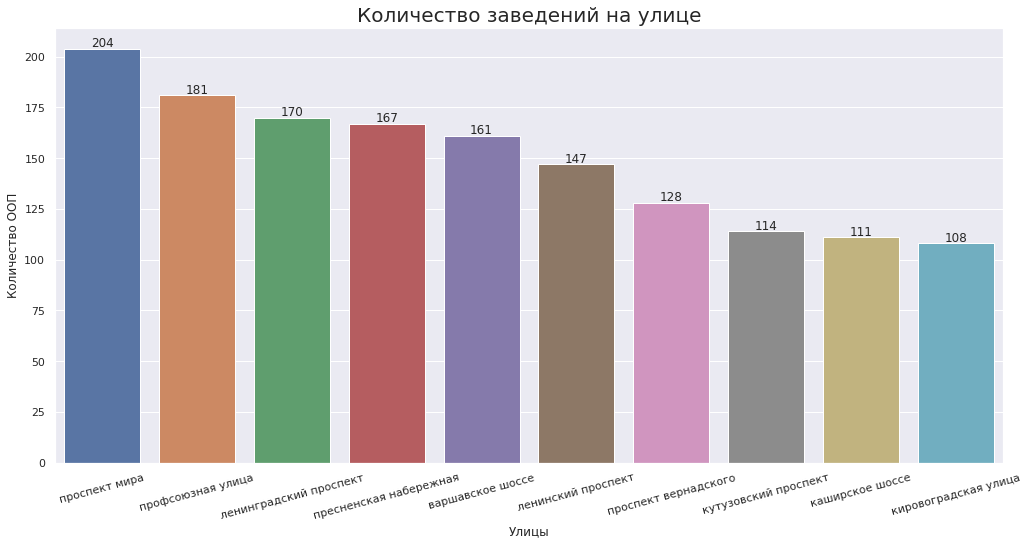

In [47]:
#визуализация среднего количества мест по видам
barplot_create('streetname','id', streets_top,
                "Количество заведений на улице","Улицы","Количество ООП",1,15)

Определим в каких районах Москвы находятся данные улицы:

In [48]:
streets_top_area = streets_top.merge(blank[['streetname','area']], on = 'streetname', how = 'left')
print(streets_top_area.area.to_list())
print('------------')
print('Таких района:',streets_top_area.area.count())

['Алексеевский район', 'Ярославский Район', 'Район Марьина роща', 'Останкинский район', 'Район Ростокино', 'Район Свиблово', 'Мещанский район', 'Академический район', 'Район Черемушки', 'Район Ясенево', 'Район Коньково', 'Обручевский район', 'Район Теплый Стан', 'Район Аэропорт', 'Район Беговой', 'Хорошевский район', 'Район Сокол', 'Пресненский район', 'Район Чертаново Центральное', 'Район Чертаново Северное', 'Район Чертаново Южное', 'Донской район', 'Район Нагатино-Садовники', 'Нагорный район', 'Район Северное Бутово', 'Район Южное Бутово', 'Район Проспект Вернадского', 'Район Тропарево-Никулино', 'Донской район', 'Район Гагаринский', 'Ломоносовский район', 'Обручевский район', 'Район Теплый Стан', 'Район Якиманка', 'Район Проспект Вернадского', 'Район Раменки', 'Район Тропарево-Никулино', 'Район Гагаринский', 'Ломоносовский район', 'Район Дорогомилово', 'Район Фили-Давыдково', 'Район Москворечье-Сабурово', 'Район Нагатино-Садовники', 'Район Орехово-Борисово Южное', 'Район Орехово-Бо

Теперь определим число улиц, на которых находится один ООП:

In [49]:
lonely_cafe_street = df_area.groupby(['streetname','okrug']).agg({'id':'count'}).sort_values(by='id').reset_index().query('id==1')
print('Улиц, на которых находится один ООП в г. Москве:',lonely_cafe_street.shape[0])

Улиц, на которых находится один ООП в г. Москве: 517


Теперь также, с помощью внешней информации определим в каких районах находятся эти улицы

In [50]:
streets_one_area = lonely_cafe_street.merge(blank[['streetname','area']], on = 'streetname', how = 'left')\
                   .drop_duplicates(subset=['streetname','okrug', 'id'])
print('Таких района:',streets_one_area.area.count())


Таких района: 517


Так как мы получили достаточно большой список, сгруппируем по району и покажем 10 районов, на которых находятся улицы, с одним ООП (их количество).

In [51]:
display(streets_one_area.groupby(['area']).agg({'streetname':'count'})\
        .sort_values(by='streetname', ascending=False).reset_index().head(10))

,area,streetname
0,Таганский район,27
1,Басманный район,24
2,Район Хамовники,22
3,Тверской район,20
4,Пресненский район,19
5,Район Марьина роща,17
6,Район Сокольники,15
7,Район Арбат,14
8,Район Замоскворечье,14
9,Мещанский район,13


Районы, попавшие в топ-10 располагаются в центральной части Москвы. Самая центральная часть Москвы примечательна старой низкоэтажной застройкой, короткими старыми улочками, старыми промышленными зонами. С учетом нашей группировки, вполне логично, что в таких местах вполне может быть один ООП на улицу.

## Распределение количества посадочных мест для улиц с большим количеством ООП

В предыдущем шаге, мы определили топ-10 улиц с самым большой концентрацией ООП. Чтобы посмотреть распределние мест в заведениях на таких улицах, определим такие заведения:

In [52]:
top_cafe_seats = df[df['streetname'].isin(streets_top['streetname'].tolist())]
top_cafe_seats.head(5)

,id,object_name,chain,object_type,address,number,streetname
151,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,варшавское шоссе
152,23618,subway,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе
153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,варшавское шоссе
154,152556,шаурма в пите,нет,фаст-фуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,варшавское шоссе


Визуализируем наши данные, но с т.к. выбросы могут не позволить нам взглянуть на полную картину, ограничим значния по оси Y до 400.

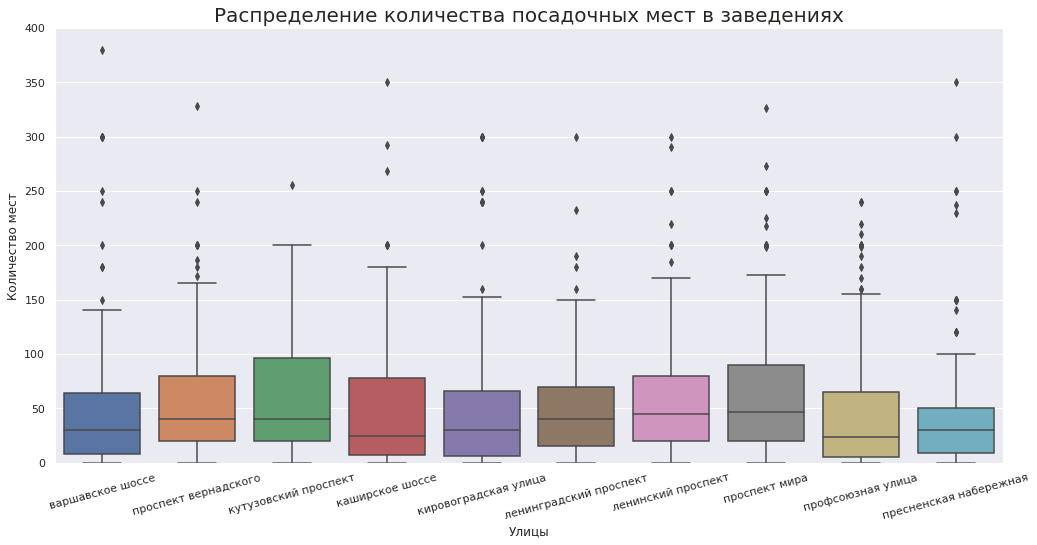

In [53]:
boxplot_create("streetname","number",top_cafe_seats,None,'Распределение количества посадочных мест в заведениях',\
               'Улицы','Количество мест',15,400)

На *варшавском шоссе*, *каширском шоссе*, *профсоюзной улице* можно увидеть медианное значение на уровне 25-27 мест на одно заведение. На *пресненской набережной*, выделяется небольшой разброс количества мест в заведениях. На кутузовском проспекте, бросается в небольшая медиана, но больший разброс количества мест в ООП. Рассмотрим такие же показатели в разрезе сетевых/несетевых ООП.

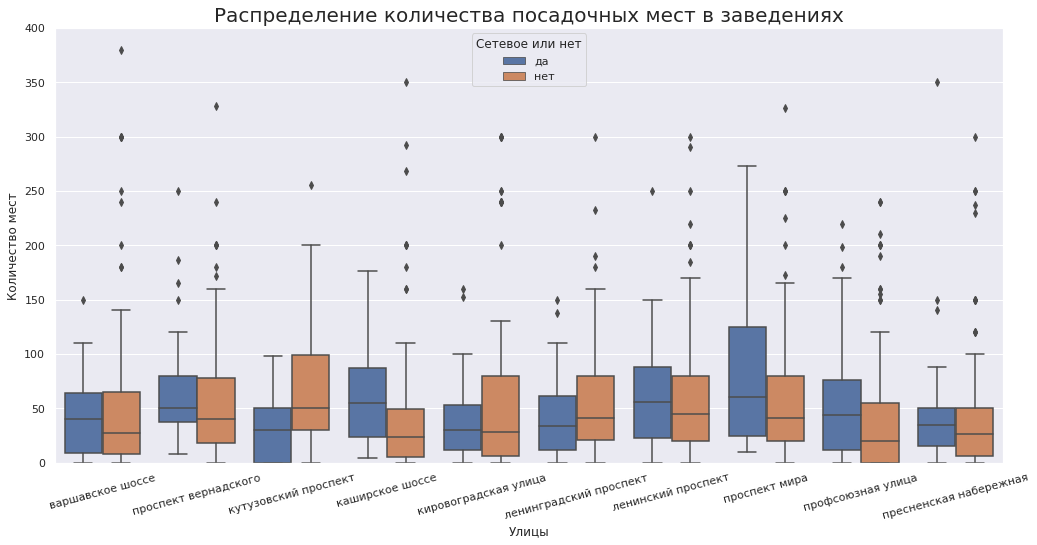

In [54]:
boxplot_create("streetname","number",top_cafe_seats,'chain','Распределение количества посадочных мест в заведениях',\
               'Улицы','Количество мест',15,400)
plt.legend(title='Сетевое или нет');

Из визуализиции видно:
* `проспект мира` - у сетевых ООП в среднем больше мест, чем у несетевых. Разброс количества мест у сетевых больше;
* `профсоюзная улица` - у несетевых график начинается с самого нуля, модно предложить на этой улице много ООП в виде закусочных, кулинарий;
* `ленинградский проспект` - тут у сетевых и несетевых, близкие показатели, лишь медиана чуть больше у сетевых;
* `пресненская набережная` - количество мест в заведениях на этой улице, меньше чем на других, с учетом сетевых и несетевых ООП;
* `варшавское шоссе` - медианное значение у сетевых ООП больше, однако у несетевых разброс мест выше;
* `ленинский проспект` - в целом похожие показатели, даже медианы близки;
* `проспект вернадского` - медиана количества мест, больше у сетевых, но вариативность мест больше у сетевых;
* `кутузовский проспект` - резкий отрыв количества мест у несетевых относитлеьно сетевых, медиана тоже выше;
* `каширское шоссе` - количество мест у сетевых заведений больше, чем у несетевых, медиана отличается примерно в два раза;
* `кировоградская улица` - одинаковое медианное значение, но большой "хвост" у несетевых заведений, значит, что как правило, у несетевого заведения на этой улице будет 50 мест.

Для точного восприятия, рассмотрим наши визуализации в числовых значениях

In [55]:
x = top_cafe_seats.groupby(['streetname'])['number'].describe().reset_index()
x

,streetname,count,mean,std,min,25%,50%,75%,max
0,варшавское шоссе,161.0,52.875776,75.094837,0.0,8.0,30.0,64.0,500.0
1,каширское шоссе,111.0,55.504505,87.962376,0.0,7.0,25.0,77.5,680.0
2,кировоградская улица,108.0,59.787037,79.480327,0.0,6.0,30.0,65.5,300.0
3,кутузовский проспект,114.0,85.061404,194.464196,0.0,20.0,40.0,96.0,1700.0
4,ленинградский проспект,170.0,52.764706,63.361020,0.0,15.0,40.0,70.0,625.0
5,ленинский проспект,147.0,63.469388,67.969706,0.0,20.0,45.0,80.0,495.0
6,пресненская набережная,167.0,45.844311,65.316834,0.0,8.5,30.0,50.0,478.0
7,проспект вернадского,128.0,68.804688,123.295181,0.0,20.0,40.0,80.0,1288.0
8,проспект мира,204.0,62.696078,58.972447,0.0,20.0,46.5,90.0,326.0
9,профсоюзная улица,181.0,46.668508,56.195201,0.0,5.0,24.0,65.0,240.0


Как мы видели на визуализации *проспект мира* и *ленинский проспект* показывают нам наибольшие медианные значения мест. Самые низкие на *каширском шоссе* и *профсоюзной улице*.

Для формирования усредненных данных для заведения, мы возьмем показатели от 25% до 75% количества мест. Из общих данных, следует:

In [56]:
for i in range(len(x)):
    #print(x['streetname'][i], '       медиана:', x['50%'][i], '      Доступный диапазон:', x['25%'][i], '-',x['75%'][i])
    print(f" {x['streetname'][i]}     медиана: {x['50%'][i]}     Доступный диапазон: {x['25%'][i]} -  {x['75%'][i]}")

 варшавское шоссе     медиана: 30.0     Доступный диапазон: 8.0 -  64.0
 каширское шоссе     медиана: 25.0     Доступный диапазон: 7.0 -  77.5
 кировоградская улица     медиана: 30.0     Доступный диапазон: 6.0 -  65.5
 кутузовский проспект     медиана: 40.0     Доступный диапазон: 20.0 -  96.0
 ленинградский проспект     медиана: 40.0     Доступный диапазон: 15.0 -  70.0
 ленинский проспект     медиана: 45.0     Доступный диапазон: 20.0 -  80.0
 пресненская набережная     медиана: 30.0     Доступный диапазон: 8.5 -  50.0
 проспект вернадского     медиана: 40.0     Доступный диапазон: 20.0 -  80.0
 проспект мира     медиана: 46.5     Доступный диапазон: 20.0 -  90.0
 профсоюзная улица     медиана: 24.0     Доступный диапазон: 5.0 -  65.0


Дополнительно рассмотрим различия в количестве мест/расположения на улице в зависимости от принадлежности к сетевым заведениям или нет

In [57]:
y = top_cafe_seats.groupby(['streetname','chain'])['number'].describe().reset_index()
y

,streetname,chain,count,mean,std,min,25%,50%,75%,max
0,варшавское шоссе,да,42.0,42.285714,37.363270,0.0,8.50,40.0,64.00,150.0
1,варшавское шоссе,нет,119.0,56.613445,84.305147,0.0,8.00,27.0,65.00,500.0
2,каширское шоссе,да,23.0,61.608696,45.332849,4.0,24.00,55.0,87.00,176.0
3,каширское шоссе,нет,88.0,53.909091,96.181060,0.0,5.00,24.0,49.25,680.0
4,кировоградская улица,да,38.0,38.631579,38.626710,0.0,11.50,30.0,53.25,160.0
5,кировоградская улица,нет,70.0,71.271429,92.821150,0.0,6.00,28.5,80.00,300.0
6,кутузовский проспект,да,24.0,32.750000,30.859077,0.0,0.00,30.0,50.00,98.0
7,кутузовский проспект,нет,90.0,99.011111,216.409749,0.0,30.00,50.0,99.50,1700.0
8,ленинградский проспект,да,56.0,40.982143,37.030450,0.0,11.50,34.0,61.25,150.0
9,ленинградский проспект,нет,114.0,58.552632,72.347379,0.0,20.75,41.0,80.00,625.0


In [58]:
y_chain = y.query('chain=="да"').reset_index()
y_not_chain = y.query('chain=="нет"').reset_index()

Выберем такие же критерии по количеству мест на улице - медина и 25%-75% интервал

In [59]:
for i in range(len(y_chain)):
    #print(y_chain['streetname'][i], '       медиана:', y_chain['50%'][i], '      Доступный диапазон:', y_chain['25%'][i], '-',y_chain['75%'][i])
    print(f" {y_chain['streetname'][i]}     медиана: {y_chain['50%'][i]}     Доступный диапазон: {y_chain['25%'][i]} -  {y_chain['75%'][i]}")

 варшавское шоссе     медиана: 40.0     Доступный диапазон: 8.5 -  64.0
 каширское шоссе     медиана: 55.0     Доступный диапазон: 24.0 -  87.0
 кировоградская улица     медиана: 30.0     Доступный диапазон: 11.5 -  53.25
 кутузовский проспект     медиана: 30.0     Доступный диапазон: 0.0 -  50.0
 ленинградский проспект     медиана: 34.0     Доступный диапазон: 11.5 -  61.25
 ленинский проспект     медиана: 55.5     Доступный диапазон: 22.75 -  88.0
 пресненская набережная     медиана: 35.0     Доступный диапазон: 15.0 -  50.0
 проспект вернадского     медиана: 50.0     Доступный диапазон: 37.0 -  80.0
 проспект мира     медиана: 60.0     Доступный диапазон: 25.0 -  125.0
 профсоюзная улица     медиана: 44.0     Доступный диапазон: 11.5 -  76.25


У сетевых наблюдаем наибольшие медианные значения: *каширское шоссе*, *проспект мира*, *ленинский проспект*. Наименьшие *кутузовский проспект* и *кировоградская улица*.

In [60]:
for i in range(len(y_not_chain)):
    print(f" {y_not_chain['streetname'][i]}     медиана: {y_not_chain['50%'][i]}     Доступный диапазон: {y_not_chain['25%'][i]} -  {y_not_chain['75%'][i]}")

 варшавское шоссе     медиана: 27.0     Доступный диапазон: 8.0 -  65.0
 каширское шоссе     медиана: 24.0     Доступный диапазон: 5.0 -  49.25
 кировоградская улица     медиана: 28.5     Доступный диапазон: 6.0 -  80.0
 кутузовский проспект     медиана: 50.0     Доступный диапазон: 30.0 -  99.5
 ленинградский проспект     медиана: 41.0     Доступный диапазон: 20.75 -  80.0
 ленинский проспект     медиана: 45.0     Доступный диапазон: 20.0 -  80.0
 пресненская набережная     медиана: 26.5     Доступный диапазон: 6.25 -  50.0
 проспект вернадского     медиана: 40.0     Доступный диапазон: 18.5 -  77.5
 проспект мира     медиана: 41.0     Доступный диапазон: 20.0 -  80.0
 профсоюзная улица     медиана: 20.0     Доступный диапазон: 0.0 -  55.0


У несетевых наибольшее медианное значение *кутузовский проспект* и *ленинский проспект*, наименьшее на *варшавское шоссе* и *каширское шоссе*.

## Вывод

**Данные**

В хорошем состоянии, пропусков не было, наименования столбцов - корректное, привели две категории ООП в более короткому написанию, которе не искажает суть, однако в дальнейшем будет корректно отображаться на графиках. Привели к строчному написанию названия заведения, затем привели разное написание к одному значению и сократили количество повторений названий ООП на 582 позиции! Добавили к датасету данные о районах из внешнего источника.

**Тип заведения**

В общей массе, наиболее распространёнными типами являются: 
* кафе (6099 единиц и 40% от общей массы);
* столовая (2587 единиц и 17% от общего числа);
* ресторан (2285 единиц и 15% от общего числа).

При анализе, выяснили, что несетевые заведения преобладают (12398 штук и 81%) над сетевыми (2968 единиц и 19%).

При детальном рассмотрении сетевых заведений, топ-3 несколько изменился, и выглядит так:
* кафе (1396 единиц);
* фаст-фуд (791 единиц);
* ресторан (544 единиц).

Стоит также отметить, наиболее высокий процент принадлжености к сети, у фаст-фуда, он составляет 41,13%.

**Количество мест**

Для сетевых заведений характерно небольшое количество точек до 10 и малое и среднее количество мест до 100.
Самое большое среднее количество мест в столовых (103), затем в ресторане (80). Как правило, в закусочных или кулинариях их вовсе нет.

Если смотреть с точки зрения, сетевое заведение или нет? То у несетевых столовых больше мест (также у буфетов), а вот у ресторанов наоборот, у сетевых больше. Также у фаст-фуда,у баров и кафе, в сетевых заведениях больше мест.

**Количество заведений на улице**

Наибольшее количество заведений в Москве сосредоточено на улицах: `проспект мира`, `профсоюзная улица`, `ленинградский проспект`. Для заведений на таких улицах, мы определили медианное значение мест (24-46,5) и диапазон (5-90 мест).
Если смотреть с точки зрения сетевого или нет, то на даных улицах получили такие результаты:
* сетевое заведение - медиана (34-60) и диапазон (11,5-125);
* несетевое заведение - медиана (20-41) и диапазон (0-80).

**Рекомендации**

Проведя анализ, можно рекомендовать для открытия заведение со следующими параметрами:
* Вид заведения - кафе (столовая или ресторан);
* Тип заведения - преимущественно несетевое;
* Количество мест - от 30 до 50 (для столовой и ресторана от 50 до 150);
* Улица - Проспект мира, Профсоюзная улица, Ленинградский проспект.


* *примечание: данная рекомендация основывается исключительно на количественном анализе рынка. И не включает в себя анализ концепции заведения (его интерьера, меню, ценовой политики, нацеленность на аудиторию), проходимости того или иного места (в том числе где находится заведение и его аудитория), а также способов и методов управления таким заведением и других экономических показателей.*

Презентация:  <a href="https://disk.yandex.ru/i/A7A4Du-VkP-tmQ">Находится тут</a>  <a href="https://drive.google.com/file/d/1gj2JixdxnxNdE3Q4DjzATe-lcJvt2Xcg/view?usp=sharing"> или тут</a> 